[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Starting analysis for subreddit: teenagers
Fetching comments from teenagers...


<ipython-input-4-a38b4cfe2167>:33: UserWarning: The comments for this submission have already been fetched, so the updated comment_sort will not have any effect.
  submission.comment_sort = "top"
<ipython-input-4-a38b4cfe2167>:36: RuntimeWarning: coroutine 'CommentForest.replace_more' was never awaited
  submission.comments.replace_more(limit=0)


Comment 1: Finally 🙏

Hope the banner that wins is a good one fr
Comment 2: Voted👍 :D
Comment 3: I’m so excited about this! Good luck and nice work to everyone who submitted something :)
Comment 4: Done
Comment 5: u/sweeterthan-death it’s here now!!


ERROR:asyncio:Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x7d9115fe0520>


Fetched 7846 comments from teenagers
Performing sentiment analysis for teenagers...
Data for teenagers saved to teenagers_comments_with_sentiment.csv
Generating visualizations for teenagers...


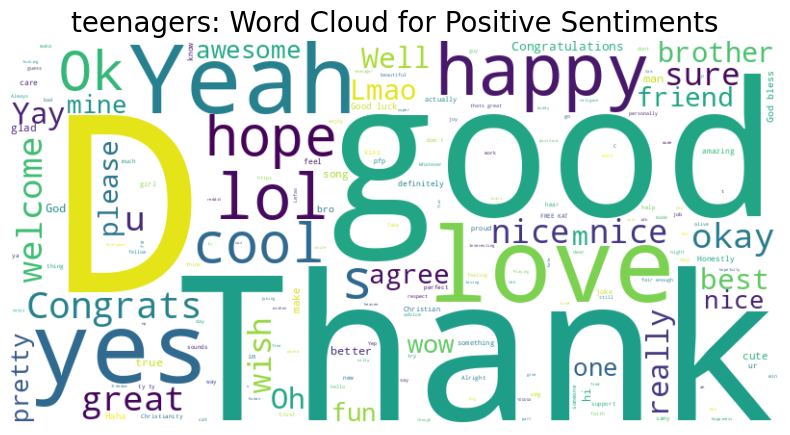

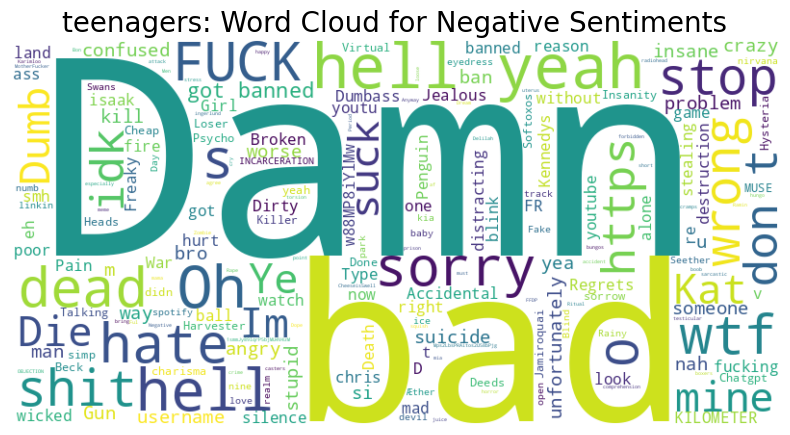

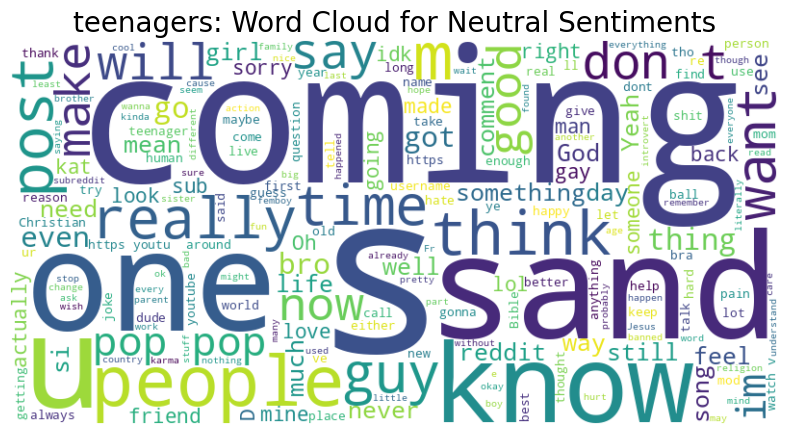

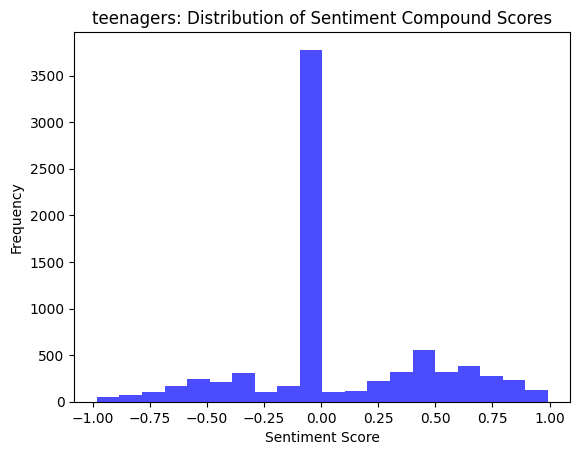

Starting analysis for subreddit: europe
Fetching comments from europe...
Comment 1: Congrats to the Kremlin mafia: the West as a geopolitical bloc has been terminated. With an old, unhinged Joker in the White House for four more years (if he leaves after 4 years, which is a big if), we'll very soon have trade wars with the US, probably a US retreat from Nato, no more US weapons for Ukraine and an end to the Russia sanctions. 

A dream scenario for Putin (and China).

Russia's strategy is very simple now: they just need one or two more Orbans in an already divided Europe to finish the job.
Comment 2: Trump: “I have a very good relationship with President Putin.”

Zelenskyy: “I hope we have more good relations with us.”

Trump: “Oh, I see. It takes two to tango, you know.”

What a despicable traitor https://x.com/RpsAgainstTrump/status/1839684261491638284

The meeting with Zelensky happened only because Trump wants to please the supporters of Ukraine just before the election btw
Comment 

ERROR:asyncio:Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x7d9115fad540>


Fetched 17172 comments from europe
Performing sentiment analysis for europe...
Data for europe saved to europe_comments_with_sentiment.csv
Generating visualizations for europe...


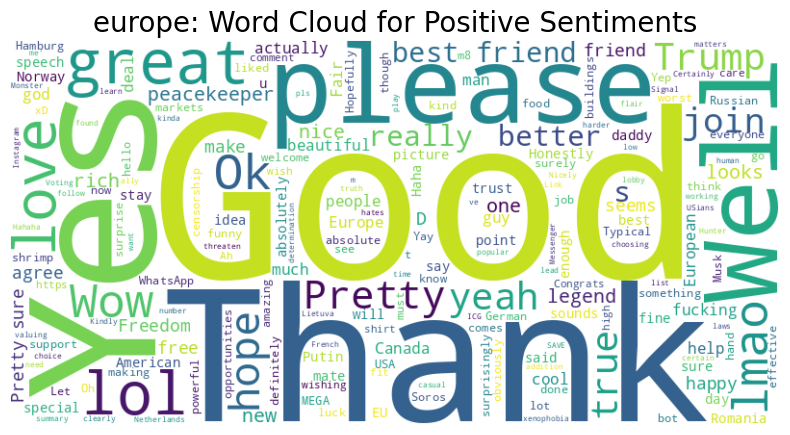

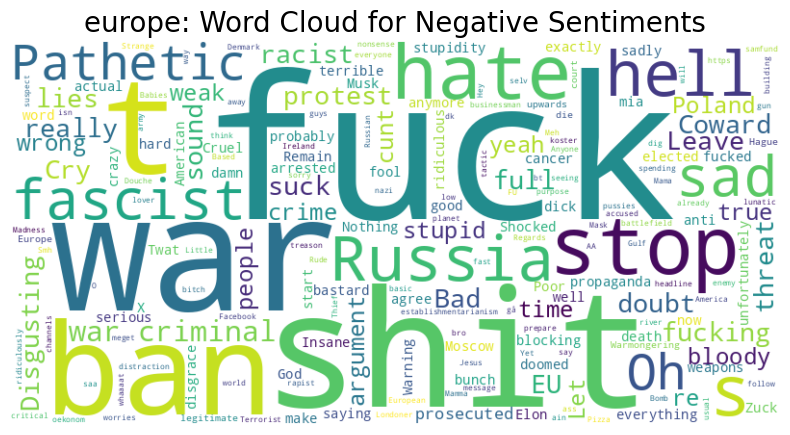

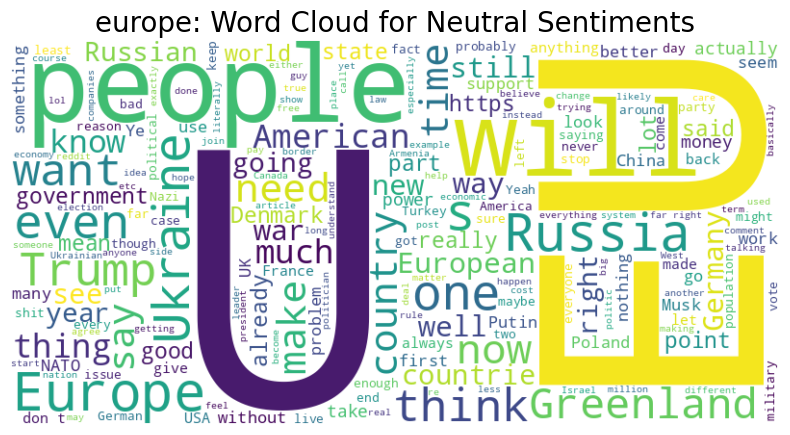

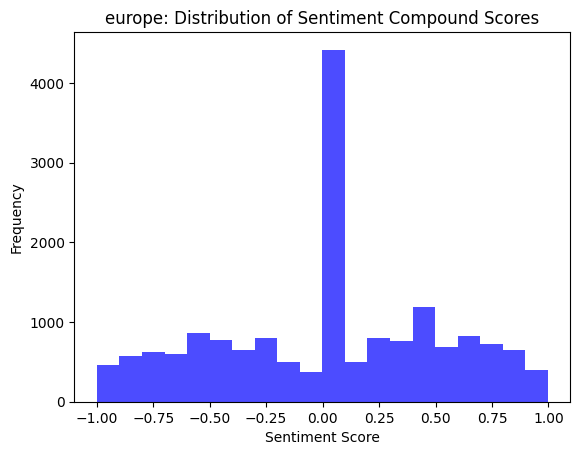

Starting analysis for subreddit: indiaspeaks
Fetching comments from indiaspeaks...
Comment 1: 👍🏻
Comment 2: Titling rule violations are insane rn. Granted new trend by news sites of having incomplete headlines warrants change in titling rules. But crub your bias! People post videos and spew their vitriol. 


Posts not related to India are so many. Leveraging loose interpretations of geopolitics rule.


Posts that don't have original titles (like tiktok/insta posts) have highly opinionated titles that warranty questioning of op's sanity. 
Comment 3: I live in Minneapolis so I will be visiting the target superstore tomorrow
Comment 4: Ye pen day kya hai bhai?
Comment 5: Why are our teachers such fun police. They just hate students having fun and enjoying. Even if its about discipline and school ka naam kharab hoga, still better than wearing nothing but blazer.


ERROR:asyncio:Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x7d9119f0f0d0>


Fetched 5290 comments from indiaspeaks
Performing sentiment analysis for indiaspeaks...
Data for indiaspeaks saved to indiaspeaks_comments_with_sentiment.csv
Generating visualizations for indiaspeaks...


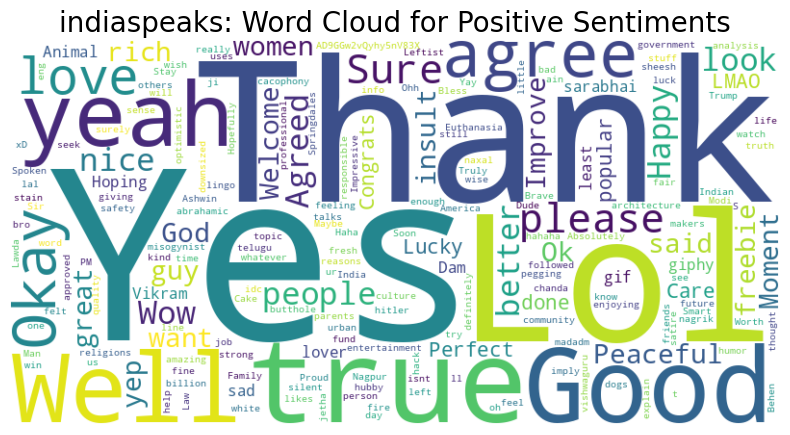

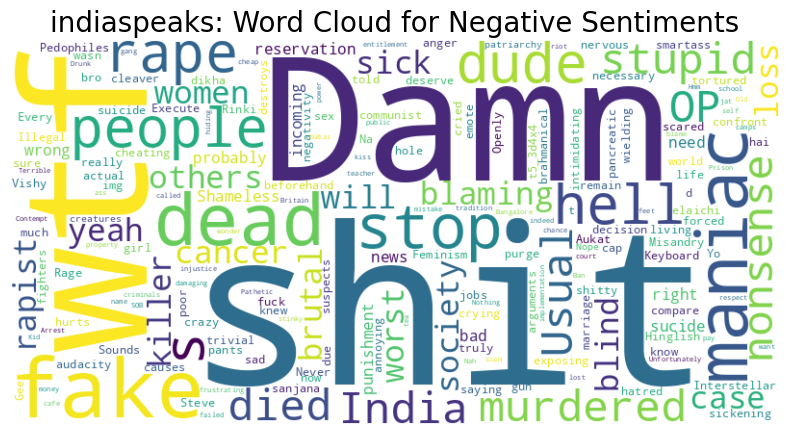

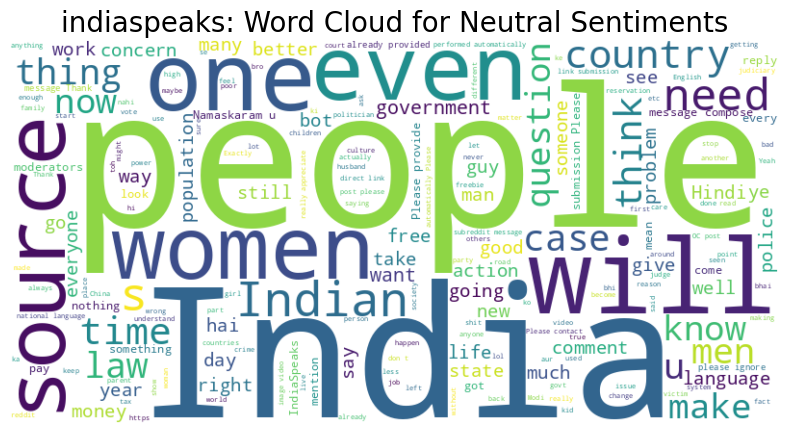

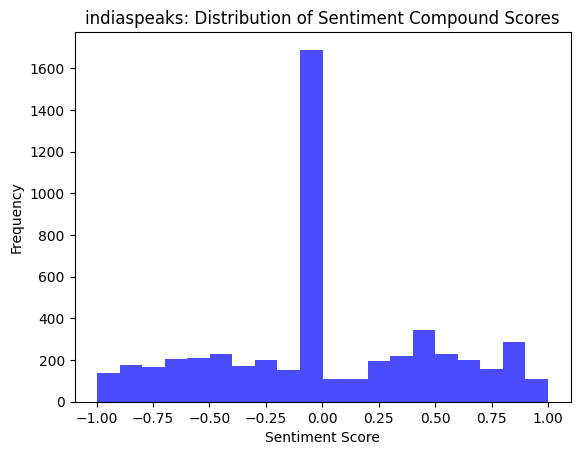

Starting analysis for subreddit: UkraineConflict
Fetching comments from UkraineConflict...
Comment 1: All this gloom and doom doesn’t stop his hordes taking territory as we speak.
Comment 2: Taking, but how long will they be able to keep it is unclear.  So many unknowns.
Comment 3: 'received' is the wrong term. That lynx was build inside ukraine

sorry for the german:

>„Wenn der Vertrag unterschrieben ist, wollen wir in der Ukraine nach etwa sechs bis sieben Monaten das erste radgetriebene Fahrzeug fertig haben – und nach zwölf bis 13 Monaten den ersten Lynx“, sagte Papperger der WirtschaftsWoche. Eine Fertigung des Fuchs aus der Ukraine sei damit ab Spätsommer 2024 möglich und der Puma-Konkurrent Lynx könne bereits im Sommer 2025 folgen.
 

https://www.wiwo.de/unternehmen/industrie/rheinmetall-panzerproduktion-in-der-ukraine-soll-schon-2024-starten/29532760.html

https://www.n-tv.de/wirtschaft/Erste-Panzer-aus-der-Ukraine-sollen-2024-fertig-sein-article24573169.html

bad english tldr

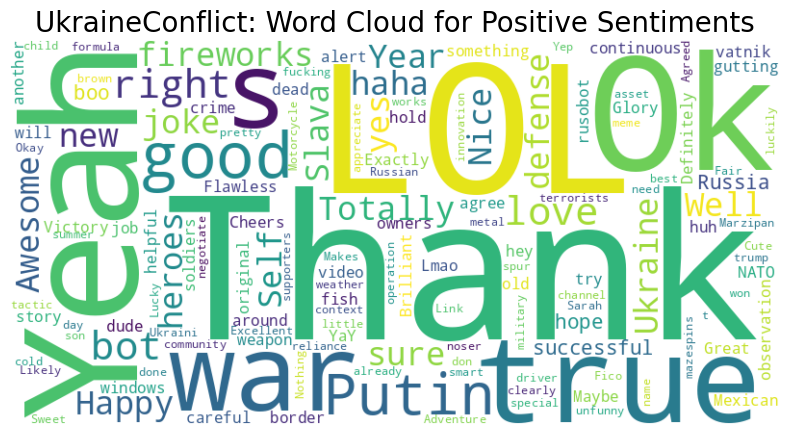

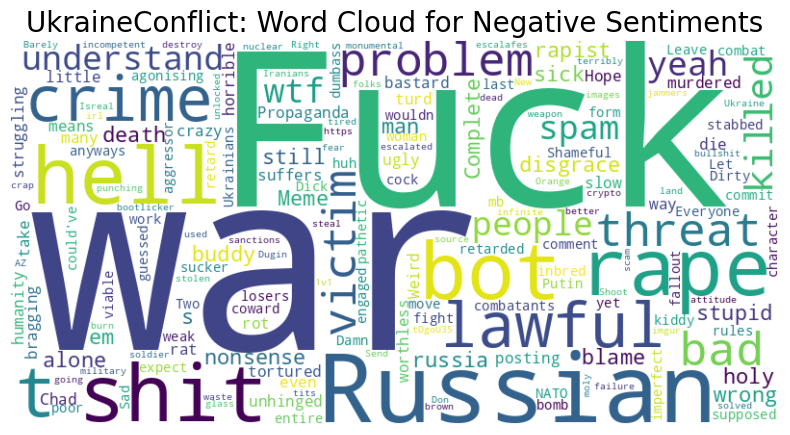

ERROR:asyncio:Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x7d9115fc2530>
ERROR:asyncio:Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x7d91157ce110>
ERROR:asyncio:Unclosed connector
connections: ['deque([(<aiohttp.client_proto.ResponseHandler object at 0x7d911b22b0a0>, 8270.235581272)])']
connector: <aiohttp.connector.TCPConnector object at 0x7d91157cc640>


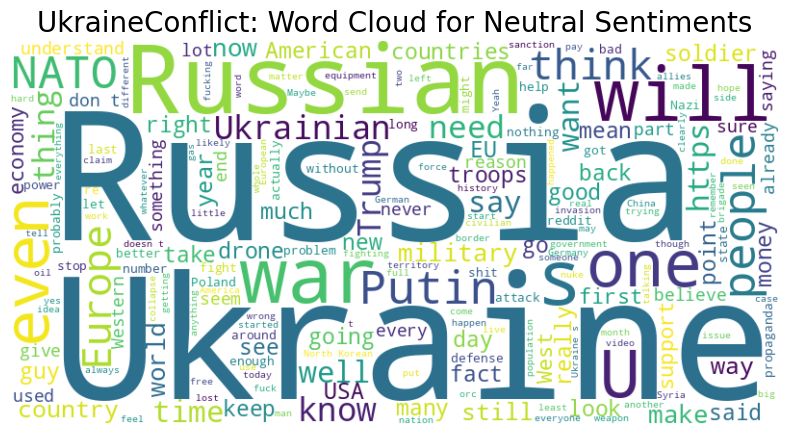

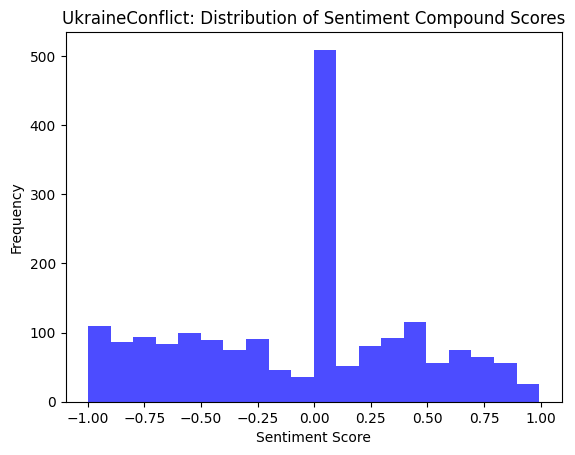

Starting analysis for subreddit: CollegeRant
Fetching comments from CollegeRant...
Comment 1: Hello
Comment 2: [removed]
Comment 3: [deleted]
Comment 4: Says address is invalid
Comment 5: Hi
Fetched 5532 comments from CollegeRant
Performing sentiment analysis for CollegeRant...
Data for CollegeRant saved to CollegeRant_comments_with_sentiment.csv
Generating visualizations for CollegeRant...


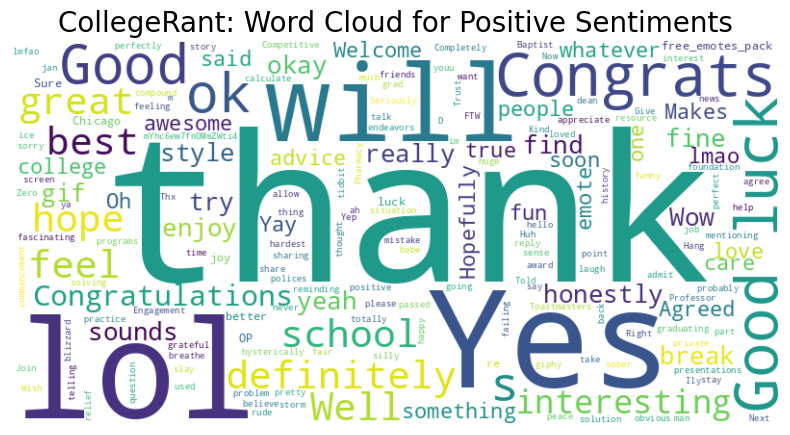

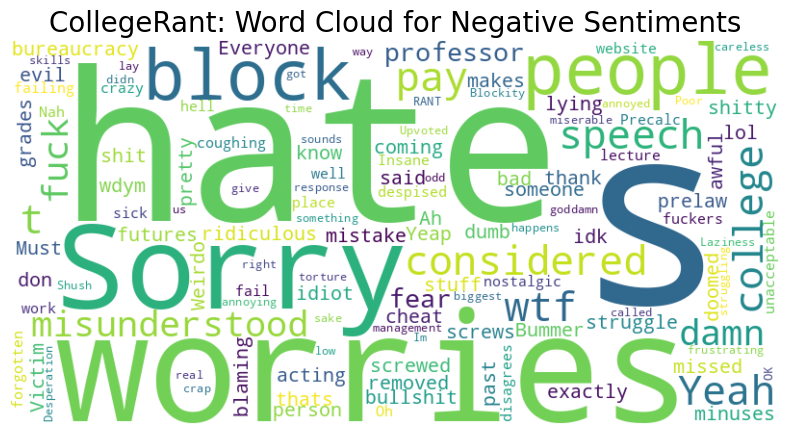

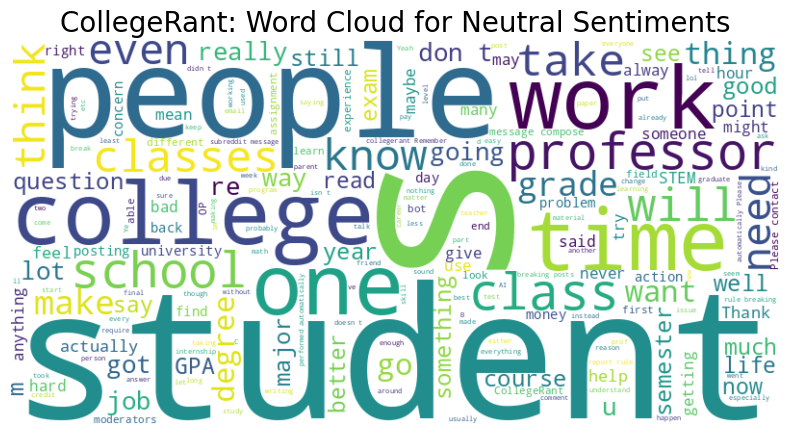

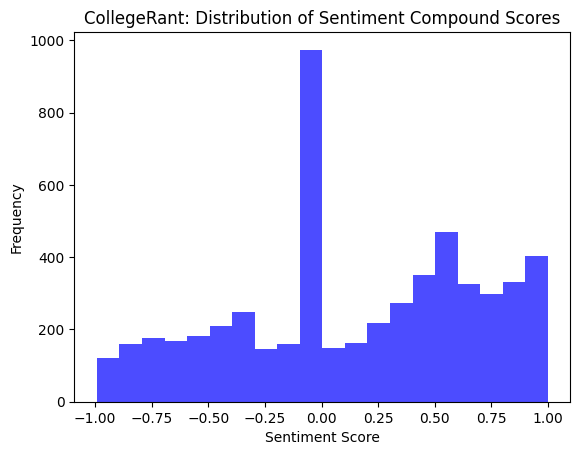

In [ ]:
!pip install asyncpraw pandas nltk
import asyncio
import asyncpraw
from nltk.sentiment import SentimentIntensityAnalyzer
import pandas as pd
import nltk
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Download NLTK resources VADER
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()

# Function to configure the Reddit API
async def configure_reddit():
    return asyncpraw.Reddit(
        client_id='qFbtp7NprsTHZ2SNGjM3hA',
        client_secret='77mp_LOEDuw4V38nDcVrm2_4yteI7Q',
        user_agent='Any-Restaurant4462'
    )

# Fetch comments from a subreddit
async def fetch_comments(subreddit_name, total_comments=20000, submission_limit=200):
    reddit = await configure_reddit()
    comments_data = []

    try:
        subreddit = await reddit.subreddit(subreddit_name)
        print(f"Fetching comments from {subreddit_name}...")

        async for submission in subreddit.hot(limit=submission_limit):
            await submission.load()
            submission.comment_sort = "top"

            # Replace 'MoreComments' objects to access all comments
            submission.comments.replace_more(limit=0)
            for comment in submission.comments.list():
                if len(comments_data) >= total_comments:
                    break
                    #ensure object is a valid comment and appends relavnant data
                if isinstance(comment, asyncpraw.models.Comment):
                    comments_data.append({
                        'subreddit': subreddit_name,
                        'submission_title': submission.title,
                        'comment_body': comment.body,
                        'score': comment.score
                    })
                    if len(comments_data) <= 5:
                        print(f"Comment {len(comments_data)}: {comment.body}")

            if len(comments_data) >= total_comments:
                break


        print(f"Fetched {len(comments_data)} comments from {subreddit_name}")
    except Exception as e:
        print(f"Error fetching data from {subreddit_name}: {e}")

    return comments_data

# Perform sentiment analysis
def analyze_sentiment(comments):
    results = []
    for comment in comments:
        sentiment = sia.polarity_scores(comment['comment_body'])
        comment.update({
            'sentiment_neg': sentiment['neg'],
            'sentiment_neu': sentiment['neu'],
            'sentiment_pos': sentiment['pos'],
            'sentiment_compound': sentiment['compound']
        })
        results.append(comment)
    return results

# Generate a word cloud
def generate_wordcloud(comments, sentiment_filter, title):
    # Filter comments based on sentiment threshold
    filtered_comments = [c['comment_body'] for c in comments if c[sentiment_filter] > 0.5]

    if not filtered_comments:
        print(f"No comments found for {title}. Skipping word cloud generation.")
        return  # Skip word cloud generation if no comments are found

    text = " ".join(filtered_comments)
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title, fontsize=20)
    plt.show()

# Main function for individual analysis
async def main():
    subreddits = ["teenagers", "europe", "indiaspeaks", "UkraineConflict", "CollegeRant"]

    for subreddit in subreddits:
        print(f"Starting analysis for subreddit: {subreddit}")

        # Fetch comments for the subreddit
        subreddit_comments = await fetch_comments(subreddit, total_comments=20000)

        # Perform sentiment analysis
        print(f"Performing sentiment analysis for {subreddit}...")
        analyzed_comments = analyze_sentiment(subreddit_comments)

        # Convert results to DataFrame
        df = pd.DataFrame(analyzed_comments)

        # Save data to a separate CSV for each subreddit
        output_file = f"{subreddit}_comments_with_sentiment.csv"
        df.to_csv(output_file, index=False)
        print(f"Data for {subreddit} saved to {output_file}")

        # Generate visualizations
        print(f"Generating visualizations for {subreddit}...")
        generate_wordcloud(analyzed_comments, 'sentiment_pos', f"{subreddit}: Word Cloud for Positive Sentiments")
        generate_wordcloud(analyzed_comments, 'sentiment_neg', f"{subreddit}: Word Cloud for Negative Sentiments")
        generate_wordcloud(analyzed_comments, 'sentiment_neu', f"{subreddit}: Word Cloud for Neutral Sentiments")

        # Plot sentiment distribution
        sentiment_compounds = [c['sentiment_compound'] for c in analyzed_comments]
        plt.hist(sentiment_compounds, bins=20, color='blue', alpha=0.7)
        plt.title(f"{subreddit}: Distribution of Sentiment Compound Scores")
        plt.xlabel("Sentiment Score")
        plt.ylabel("Frequency")
        plt.show()

# Run the main function within an event loop if necessary

await main()
